In [3]:
import geopandas as gpd
from shapely.geometry import Point
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [4]:
madrid = gpd.read_file('Distritos.shp')

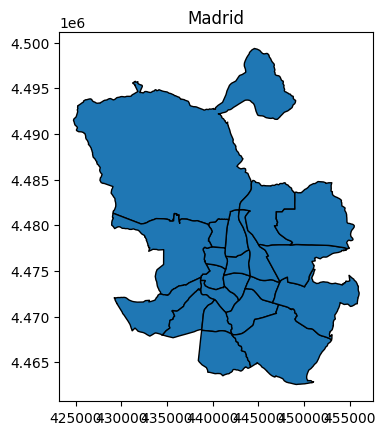

In [5]:
madrid.plot(edgecolor='black')
plt.title('Madrid')
plt.show()

In [6]:
df = pd.read_csv("restaurants_definitivo.csv", index_col=0)
df

,Name,Address,Lat,Long,Number of Ratings,Restaurant Rating,Type of Restaurant,Number of Bookmarks,Price Range,Phone Number,Website,Instagram,Facebook,Timetable,url
id,,,,,,,,,,,,,,,
1,Freedom Cakes Diner,"Calle Cádiz 7,Madrid,Spain,28004",40.415876,-3.702805,470.0,4.5,['International'],766,Moderado,+34-910741347,http://www.freedomcakes.es/,http://www.instagram.com/freedomcakes,http://facebook.com/Freedomcakesvegan,"{'Monday': '08:00 - 00:00', 'Tuesday': '08:00 ...",https://www.happycow.net/reviews/freedom-cakes...
2,Mad Mad Vegan - Chueca,"Calle Pelayo 19,Madrid,Spain,28004",40.422698,-3.698609,410.0,5.0,"['American', 'Mexican']",612,Moderado,+34-914442077,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-madri...
3,Frutas Prohibidas,"Calle del Conde Duque, 26,Madrid,Spain,28015",40.427467,-3.710349,241.0,5.0,"['International', 'Fusion']",555,Moderado,+34-911525533,http://www.frutasprohibidas.com/,http://www.instagram.com/frutasprohibidasbar,http://facebook.com/frutasprohibidasbar,"{'Monday': 'Closed', 'Tuesday': 'Closed', 'Wed...",https://www.happycow.net/reviews/frutas-prohib...
4,Mad Mad Vegan - Lavapiés,"Lavapiés 16,Madrid,Spain,28012",40.411113,-3.703039,216.0,4.5,"['American', 'Mexican']",465,Moderado,+34-910665299,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-vegan...
5,Flower Burger,"Calle Luchana 13, Chamberí,Madrid,Spain,28010",40.430001,-3.701037,14.0,4.5,"['American', 'Western']",47,Barato,+34-910328968,https://www.flowerburger.it/,http://www.instagram.com/flowerburger_es,http://facebook.com/flowerburger.it,"{'Monday': '13:00 - 16:30, 19:30 - 23:30', 'Tu...",https://www.happycow.net/reviews/flower-burger...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,Morgano Crafted Beers,"Alamo 2, Boadilla del Monte, Madrid, Spain, 28660",40.405759,-3.876917,1.0,4.0,"['Middle Eastern', 'Spanish']",2,Barato,+34-695635423,No website,No instagram,http://facebook.com/MorganoCraftedBeers,"{'Monday': '19:00 - 01:00', 'Tuesday': '19:00 ...",https://www.happycow.net/reviews/morgano-craft...
745,Adagio Gelateria,"Avenida de Adolfo Suárez, 7, Boadilla Del Mont...",40.405413,-3.876999,1.0,4.0,['Italian'],0,No price range,+34-912859853,No website,http://www.instagram.com/adagiogelateria,http://facebook.com/adagiogelateria,"{'Monday': '10:00 - 22:30', 'Tuesday': '10:00 ...",https://www.happycow.net/reviews/adagio-gelate...
746,La Huella Vegana,"Calle de las Trece Rosas, 2,Rivas-vaciamadrid,...",40.376390,-3.540020,31.0,4.5,"['Western', 'Spanish']",42,Moderado,+34-917139958,http://www.lahuellavegana.com/,No instagram,http://facebook.com/lahuellavegana,"{'Monday': '08:30 - 23:00', 'Tuesday': '08:30 ...",https://www.happycow.net/reviews/la-huella-riv...


In [7]:
# Creamos una columna 'geometry' con puntos en latitud/longitud (EPSG:4326)
df['geometry'] = df.apply(lambda row: Point(row['Long'], row['Lat']), axis=1)

In [8]:
# Convertimos a GeoDataFrame con CRS EPSG:4326 (coordenadas geográficas)
gdf = gpd.GeoDataFrame(df, geometry='geometry', crs="EPSG:4326")

In [9]:
# Transformamos al sistema de coordenadas proyectadas EPSG:25830
gdf = gdf.to_crs("EPSG:25830")
gdf

,Name,Address,Lat,Long,Number of Ratings,Restaurant Rating,Type of Restaurant,Number of Bookmarks,Price Range,Phone Number,Website,Instagram,Facebook,Timetable,url,geometry
id,,,,,,,,,,,,,,,,
1,Freedom Cakes Diner,"Calle Cádiz 7,Madrid,Spain,28004",40.415876,-3.702805,470.0,4.5,['International'],766,Moderado,+34-910741347,http://www.freedomcakes.es/,http://www.instagram.com/freedomcakes,http://facebook.com/Freedomcakesvegan,"{'Monday': '08:00 - 00:00', 'Tuesday': '08:00 ...",https://www.happycow.net/reviews/freedom-cakes...,POINT (440374.058 4474154.146)
2,Mad Mad Vegan - Chueca,"Calle Pelayo 19,Madrid,Spain,28004",40.422698,-3.698609,410.0,5.0,"['American', 'Mexican']",612,Moderado,+34-914442077,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-madri...,POINT (440736.036 4474908.563)
3,Frutas Prohibidas,"Calle del Conde Duque, 26,Madrid,Spain,28015",40.427467,-3.710349,241.0,5.0,"['International', 'Fusion']",555,Moderado,+34-911525533,http://www.frutasprohibidas.com/,http://www.instagram.com/frutasprohibidasbar,http://facebook.com/frutasprohibidasbar,"{'Monday': 'Closed', 'Tuesday': 'Closed', 'Wed...",https://www.happycow.net/reviews/frutas-prohib...,POINT (439744.363 4475445.862)
4,Mad Mad Vegan - Lavapiés,"Lavapiés 16,Madrid,Spain,28012",40.411113,-3.703039,216.0,4.5,"['American', 'Mexican']",465,Moderado,+34-910665299,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-vegan...,POINT (440349.999 4473625.614)
5,Flower Burger,"Calle Luchana 13, Chamberí,Madrid,Spain,28010",40.430001,-3.701037,14.0,4.5,"['American', 'Western']",47,Barato,+34-910328968,https://www.flowerburger.it/,http://www.instagram.com/flowerburger_es,http://facebook.com/flowerburger.it,"{'Monday': '13:00 - 16:30, 19:30 - 23:30', 'Tu...",https://www.happycow.net/reviews/flower-burger...,POINT (440536.496 4475720.826)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,Morgano Crafted Beers,"Alamo 2, Boadilla del Monte, Madrid, Spain, 28660",40.405759,-3.876917,1.0,4.0,"['Middle Eastern', 'Spanish']",2,Barato,+34-695635423,No website,No instagram,http://facebook.com/MorganoCraftedBeers,"{'Monday': '19:00 - 01:00', 'Tuesday': '19:00 ...",https://www.happycow.net/reviews/morgano-craft...,POINT (425591.093 4473163.192)
745,Adagio Gelateria,"Avenida de Adolfo Suárez, 7, Boadilla Del Mont...",40.405413,-3.876999,1.0,4.0,['Italian'],0,No price range,+34-912859853,No website,http://www.instagram.com/adagiogelateria,http://facebook.com/adagiogelateria,"{'Monday': '10:00 - 22:30', 'Tuesday': '10:00 ...",https://www.happycow.net/reviews/adagio-gelate...,POINT (425583.754 4473124.855)
746,La Huella Vegana,"Calle de las Trece Rosas, 2,Rivas-vaciamadrid,...",40.376390,-3.540020,31.0,4.5,"['Western', 'Spanish']",42,Moderado,+34-917139958,http://www.lahuellavegana.com/,No instagram,http://facebook.com/lahuellavegana,"{'Monday': '08:30 - 23:00', 'Tuesday': '08:30 ...",https://www.happycow.net/reviews/la-huella-riv...,POINT (454158.033 4469674.139)


In [10]:
madrid["NOMBRE_DISTRITO"] = ["Centro", "Arganzuela", "Retiro", "Salamanca", "Chamartin",
               "Tetuan", "Chamberi", "Fuencarral-El Pardo", "Moncloa-Aravaca",
               "Latina", "Carabanchel", "Usera", "Puente de Vallecas", "Moratalaz",
               "Ciudad Lineal", "Hortaleza", "Villaverde", "Villa de Vallecas",
               "Vicalvaro", "San Blas - Canillejas", "Barajas"]
madrid

,geometry,NOMBRE_DISTRITO
0,"POLYGON ((441184.784 4473200.78, 441181.244 44...",Centro
1,"POLYGON ((440272.919 4472969.567, 440350.318 4...",Arganzuela
2,"POLYGON ((443652.149 4473312.6, 443560.739 447...",Retiro
3,"POLYGON ((444075.178 4476611.827, 444057.808 4...",Salamanca
4,"POLYGON ((442904.114 4481525.212, 442901.02 44...",Chamartin
5,"POLYGON ((440863.995 4480662.221, 440875.945 4...",Tetuan
6,"POLYGON ((441380.014 4477514.037, 441330.993 4...",Chamberi
7,"POLYGON ((445503.158 4498783.075, 445674.188 4...",Fuencarral-El Pardo
8,"POLYGON ((432093.685 4480171.575, 432166.365 4...",Moncloa-Aravaca
9,"POLYGON ((438689.611 4473668.522, 438753.889 4...",Latina


In [11]:
gdf = gdf.to_crs("EPSG:25830")
madrid = madrid.set_crs(epsg=25830)

In [12]:
# Realizar un spatial join para asociar cada punto con su distrito
gdf_resultado = gpd.sjoin(gdf, madrid, how="left", predicate="within")
gdf_resultado

,Name,Address,Lat,Long,Number of Ratings,Restaurant Rating,Type of Restaurant,Number of Bookmarks,Price Range,Phone Number,Website,Instagram,Facebook,Timetable,url,geometry,index_right,NOMBRE_DISTRITO
id,,,,,,,,,,,,,,,,,,
1,Freedom Cakes Diner,"Calle Cádiz 7,Madrid,Spain,28004",40.415876,-3.702805,470.0,4.5,['International'],766,Moderado,+34-910741347,http://www.freedomcakes.es/,http://www.instagram.com/freedomcakes,http://facebook.com/Freedomcakesvegan,"{'Monday': '08:00 - 00:00', 'Tuesday': '08:00 ...",https://www.happycow.net/reviews/freedom-cakes...,POINT (440374.058 4474154.146),0.0,Centro
2,Mad Mad Vegan - Chueca,"Calle Pelayo 19,Madrid,Spain,28004",40.422698,-3.698609,410.0,5.0,"['American', 'Mexican']",612,Moderado,+34-914442077,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-madri...,POINT (440736.036 4474908.563),0.0,Centro
3,Frutas Prohibidas,"Calle del Conde Duque, 26,Madrid,Spain,28015",40.427467,-3.710349,241.0,5.0,"['International', 'Fusion']",555,Moderado,+34-911525533,http://www.frutasprohibidas.com/,http://www.instagram.com/frutasprohibidasbar,http://facebook.com/frutasprohibidasbar,"{'Monday': 'Closed', 'Tuesday': 'Closed', 'Wed...",https://www.happycow.net/reviews/frutas-prohib...,POINT (439744.363 4475445.862),0.0,Centro
4,Mad Mad Vegan - Lavapiés,"Lavapiés 16,Madrid,Spain,28012",40.411113,-3.703039,216.0,4.5,"['American', 'Mexican']",465,Moderado,+34-910665299,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-vegan...,POINT (440349.999 4473625.614),0.0,Centro
5,Flower Burger,"Calle Luchana 13, Chamberí,Madrid,Spain,28010",40.430001,-3.701037,14.0,4.5,"['American', 'Western']",47,Barato,+34-910328968,https://www.flowerburger.it/,http://www.instagram.com/flowerburger_es,http://facebook.com/flowerburger.it,"{'Monday': '13:00 - 16:30, 19:30 - 23:30', 'Tu...",https://www.happycow.net/reviews/flower-burger...,POINT (440536.496 4475720.826),6.0,Chamberi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,Morgano Crafted Beers,"Alamo 2, Boadilla del Monte, Madrid, Spain, 28660",40.405759,-3.876917,1.0,4.0,"['Middle Eastern', 'Spanish']",2,Barato,+34-695635423,No website,No instagram,http://facebook.com/MorganoCraftedBeers,"{'Monday': '19:00 - 01:00', 'Tuesday': '19:00 ...",https://www.happycow.net/reviews/morgano-craft...,POINT (425591.093 4473163.192),NaN,NaN
745,Adagio Gelateria,"Avenida de Adolfo Suárez, 7, Boadilla Del Mont...",40.405413,-3.876999,1.0,4.0,['Italian'],0,No price range,+34-912859853,No website,http://www.instagram.com/adagiogelateria,http://facebook.com/adagiogelateria,"{'Monday': '10:00 - 22:30', 'Tuesday': '10:00 ...",https://www.happycow.net/reviews/adagio-gelate...,POINT (425583.754 4473124.855),NaN,NaN
746,La Huella Vegana,"Calle de las Trece Rosas, 2,Rivas-vaciamadrid,...",40.376390,-3.540020,31.0,4.5,"['Western', 'Spanish']",42,Moderado,+34-917139958,http://www.lahuellavegana.com/,No instagram,http://facebook.com/lahuellavegana,"{'Monday': '08:30 - 23:00', 'Tuesday': '08:30 ...",https://www.happycow.net/reviews/la-huella-riv...,POINT (454158.033 4469674.139),NaN,NaN


In [13]:
df_pandas = gdf_resultado.drop(columns=["index_right",'geometry'])
df_pandas

,Name,Address,Lat,Long,Number of Ratings,Restaurant Rating,Type of Restaurant,Number of Bookmarks,Price Range,Phone Number,Website,Instagram,Facebook,Timetable,url,NOMBRE_DISTRITO
id,,,,,,,,,,,,,,,,
1,Freedom Cakes Diner,"Calle Cádiz 7,Madrid,Spain,28004",40.415876,-3.702805,470.0,4.5,['International'],766,Moderado,+34-910741347,http://www.freedomcakes.es/,http://www.instagram.com/freedomcakes,http://facebook.com/Freedomcakesvegan,"{'Monday': '08:00 - 00:00', 'Tuesday': '08:00 ...",https://www.happycow.net/reviews/freedom-cakes...,Centro
2,Mad Mad Vegan - Chueca,"Calle Pelayo 19,Madrid,Spain,28004",40.422698,-3.698609,410.0,5.0,"['American', 'Mexican']",612,Moderado,+34-914442077,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-madri...,Centro
3,Frutas Prohibidas,"Calle del Conde Duque, 26,Madrid,Spain,28015",40.427467,-3.710349,241.0,5.0,"['International', 'Fusion']",555,Moderado,+34-911525533,http://www.frutasprohibidas.com/,http://www.instagram.com/frutasprohibidasbar,http://facebook.com/frutasprohibidasbar,"{'Monday': 'Closed', 'Tuesday': 'Closed', 'Wed...",https://www.happycow.net/reviews/frutas-prohib...,Centro
4,Mad Mad Vegan - Lavapiés,"Lavapiés 16,Madrid,Spain,28012",40.411113,-3.703039,216.0,4.5,"['American', 'Mexican']",465,Moderado,+34-910665299,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-vegan...,Centro
5,Flower Burger,"Calle Luchana 13, Chamberí,Madrid,Spain,28010",40.430001,-3.701037,14.0,4.5,"['American', 'Western']",47,Barato,+34-910328968,https://www.flowerburger.it/,http://www.instagram.com/flowerburger_es,http://facebook.com/flowerburger.it,"{'Monday': '13:00 - 16:30, 19:30 - 23:30', 'Tu...",https://www.happycow.net/reviews/flower-burger...,Chamberi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,Morgano Crafted Beers,"Alamo 2, Boadilla del Monte, Madrid, Spain, 28660",40.405759,-3.876917,1.0,4.0,"['Middle Eastern', 'Spanish']",2,Barato,+34-695635423,No website,No instagram,http://facebook.com/MorganoCraftedBeers,"{'Monday': '19:00 - 01:00', 'Tuesday': '19:00 ...",https://www.happycow.net/reviews/morgano-craft...,NaN
745,Adagio Gelateria,"Avenida de Adolfo Suárez, 7, Boadilla Del Mont...",40.405413,-3.876999,1.0,4.0,['Italian'],0,No price range,+34-912859853,No website,http://www.instagram.com/adagiogelateria,http://facebook.com/adagiogelateria,"{'Monday': '10:00 - 22:30', 'Tuesday': '10:00 ...",https://www.happycow.net/reviews/adagio-gelate...,NaN
746,La Huella Vegana,"Calle de las Trece Rosas, 2,Rivas-vaciamadrid,...",40.376390,-3.540020,31.0,4.5,"['Western', 'Spanish']",42,Moderado,+34-917139958,http://www.lahuellavegana.com/,No instagram,http://facebook.com/lahuellavegana,"{'Monday': '08:30 - 23:00', 'Tuesday': '08:30 ...",https://www.happycow.net/reviews/la-huella-riv...,NaN


In [14]:
conteo_distritos = df_pandas['NOMBRE_DISTRITO'].value_counts()
# En Villaverde no hay restaurantes. Lo añadimos aparte.
conteo_distritos.loc["Villaverde"] = 0
conteo_distritos

NOMBRE_DISTRITO
Centro                   379
Chamberi                  69
Salamanca                 65
Arganzuela                34
Tetuan                    21
Retiro                    19
Barajas                   18
Moncloa-Aravaca           17
Chamartin                 13
Latina                    11
San Blas - Canillejas      9
Hortaleza                  9
Fuencarral-El Pardo        8
Ciudad Lineal              8
Puente de Vallecas         8
Villa de Vallecas          5
Usera                      4
Carabanchel                4
Moratalaz                  4
Vicalvaro                  3
Villaverde                 0
Name: count, dtype: int64

In [15]:
madrid = madrid.merge(conteo_distritos, left_on="NOMBRE_DISTRITO", right_on="NOMBRE_DISTRITO")
madrid

,geometry,NOMBRE_DISTRITO,count
0,"POLYGON ((441184.784 4473200.78, 441181.244 44...",Centro,379
1,"POLYGON ((440272.919 4472969.567, 440350.318 4...",Arganzuela,34
2,"POLYGON ((443652.149 4473312.6, 443560.739 447...",Retiro,19
3,"POLYGON ((444075.178 4476611.827, 444057.808 4...",Salamanca,65
4,"POLYGON ((442904.114 4481525.212, 442901.02 44...",Chamartin,13
5,"POLYGON ((440863.995 4480662.221, 440875.945 4...",Tetuan,21
6,"POLYGON ((441380.014 4477514.037, 441330.993 4...",Chamberi,69
7,"POLYGON ((445503.158 4498783.075, 445674.188 4...",Fuencarral-El Pardo,8
8,"POLYGON ((432093.685 4480171.575, 432166.365 4...",Moncloa-Aravaca,17
9,"POLYGON ((438689.611 4473668.522, 438753.889 4...",Latina,11


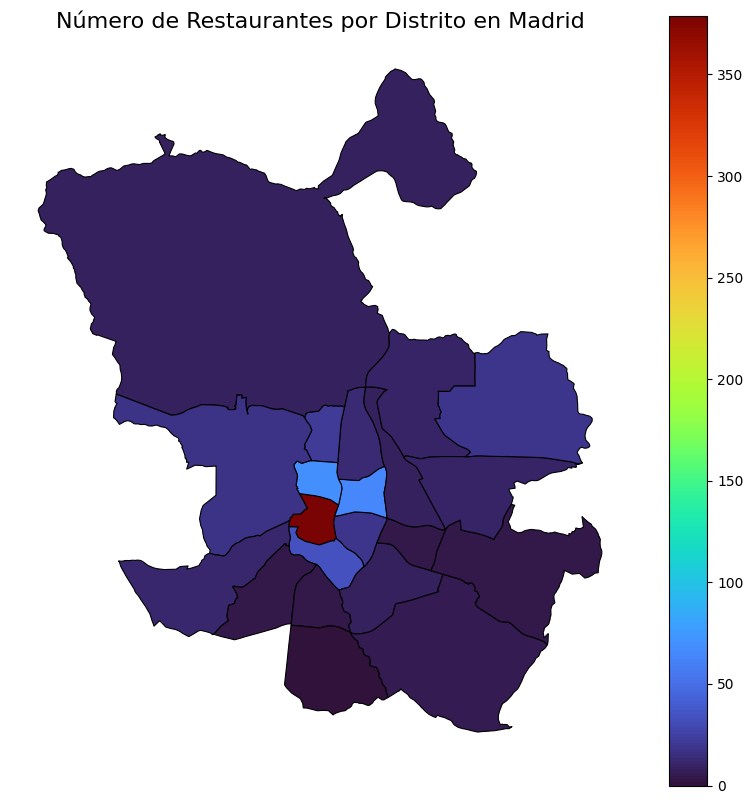

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
madrid.plot(column='count', cmap='turbo', linewidth=0.8, ax=ax, edgecolor='black', legend=True)
ax.set_title('Número de Restaurantes por Distrito en Madrid', fontsize=16)
ax.axis('off')
plt.show()

In [17]:
barrios_madrid = gpd.read_file('Barrios.shx')
lista_barrios = [
    # Distrito 1: Centro
    "Palacio", "Embajadores", "Cortes", "Justicia", "Universidad", "Sol",

    # Distrito 2: Arganzuela
    "Imperial", "Acacias", "Chopera", "Legazpi", "Delicias", "Palos de Moguer", "Atocha",

    # Distrito 3: Retiro
    "Pacífico", "Adelfas", "Estrella", "Ibiza", "Jerónimos", "Niño Jesús",

    # Distrito 4: Salamanca
    "Recoletos", "Goya", "Fuente del Berro", "Guindalera", "Lista", "Castellana",

    # Distrito 5: Chamartín
    "El Viso", "Prosperidad", "Ciudad Jardín", "Hispanoamérica", "Nueva España", "Castilla",

    # Distrito 6: Tetuán
    "Bellavista-Almenara", "Cuatro Caminos", "Castillejos", "Almenara", "Valdeacederas", "Berruguete",

    # Distrito 7: Chamberí
    "Gaztambide", "Argüelles", "Ríos Rosas", "Trafalgar", "Almagro", "Vallehermoso",

    # Distrito 8: Fuencarral-El Pardo
    "El Pardo", "Fuentelarreina", "Peñagrande", "Barrio del Pilar", "La Paz", "Valverde", "Mirasierra", "El Goloso",

    # Distrito 9: Moncloa-Aravaca
    "Casa de Campo", "Argüelles", "Ciudad Universitaria", "Valdezarza", "Valdemarín", "El Plantío", "Aravaca",

    # Distrito 10: Latina
    "Los Cármenes", "Puerta del Ángel", "Lucero", "Aluche", "Campamento", "Cuatro Vientos", "Las Águilas",

    # Distrito 11: Carabanchel
    "Comillas", "Opañel", "San Isidro", "Vista Alegre", "Puerta Bonita", "Buenavista", "Abrantes",

    # Distrito 12: Usera
    "Orcasur", "Orcasitas", "San Fermín", "Almendrales", "Moscardó", "Zofío", "Pradolongo",

    # Distrito 13: Puente de Vallecas
    "Entrevías", "San Diego", "Palomeras Bajas", "Palomeras Sureste", "Portazgo", "Numancia",

    # Distrito 14: Moratalaz
    "Pavones", "Horcajo", "Marroquina", "Media Legua", "Fontarrón", "Vinateros",

    # Distrito 15: Ciudad Lineal
    "Ventas", "Pueblo Nuevo", "Quintana", "Concepción", "San Pascual", "San Juan Bautista", "Colina", "Atalaya", "Costillares",

    # Distrito 16: Hortaleza
    "Palomas", "Valdefuentes", "Canillas", "Pinar del Rey", "Apóstol Santiago", "Valdebebas-Valdefuentes",

    # Distrito 17: Villaverde
    "San Andrés", "San Cristóbal", "Butarque", "Los Ángeles", "Los Rosales",

    # Distrito 18: Villa de Vallecas
    "Casco Histórico de Vallecas", "Santa Eugenia", "Ensanche de Vallecas",

    # Distrito 19: Vicálvaro
    "Casco Histórico de Vicálvaro", "Valdebernardo", "Valderrivas", "El Cañaveral",

    # Distrito 20: San Blas-Canillejas
    "Simancas", "Hellas", "Amposta", "Arcos", "Rosas", "Rejas", "Canillejas", "Salvador",

    # Distrito 21: Barajas
    "Alameda de Osuna", "Aeropuerto", "Casco Histórico de Barajas", "Timón", "Corralejos",
]
barrios_madrid["NOMBRE_BARRIO"] = lista_barrios
barrios_madrid


,geometry,NOMBRE_BARRIO
0,"POLYGON ((440112.785 4474645.921, 440078.075 4...",Palacio
1,"POLYGON ((440277.382 4473980.839, 440368.002 4...",Embajadores
2,"POLYGON ((440780.52 4474528.375, 440907.759 44...",Cortes
3,"POLYGON ((440991.949 4474492.423, 440907.759 4...",Justicia
4,"POLYGON ((440517.952 4474758.368, 440476.812 4...",Universidad
...,...,...
126,"POLYGON ((450614.387 4479399.407, 450752.655 4...",Alameda de Osuna
127,"POLYGON ((452408.138 4484644.7, 452415.138 448...",Aeropuerto
128,"POLYGON ((451288.265 4480266.282, 451233.112 4...",Casco Histórico de Barajas
129,"POLYGON ((450698.531 4479953.328, 450639.81 44...",Timón


In [18]:
barrios_madrid = barrios_madrid.set_crs(epsg=25830)

In [19]:
gdf_resultado2 = gpd.sjoin(gdf, barrios_madrid, how="left", predicate="within")
df_pandas_barrios = gdf_resultado2.drop(columns=["index_right",'geometry'])
df_pandas_barrios

,Name,Address,Lat,Long,Number of Ratings,Restaurant Rating,Type of Restaurant,Number of Bookmarks,Price Range,Phone Number,Website,Instagram,Facebook,Timetable,url,NOMBRE_BARRIO
id,,,,,,,,,,,,,,,,
1,Freedom Cakes Diner,"Calle Cádiz 7,Madrid,Spain,28004",40.415876,-3.702805,470.0,4.5,['International'],766,Moderado,+34-910741347,http://www.freedomcakes.es/,http://www.instagram.com/freedomcakes,http://facebook.com/Freedomcakesvegan,"{'Monday': '08:00 - 00:00', 'Tuesday': '08:00 ...",https://www.happycow.net/reviews/freedom-cakes...,Sol
2,Mad Mad Vegan - Chueca,"Calle Pelayo 19,Madrid,Spain,28004",40.422698,-3.698609,410.0,5.0,"['American', 'Mexican']",612,Moderado,+34-914442077,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-madri...,Justicia
3,Frutas Prohibidas,"Calle del Conde Duque, 26,Madrid,Spain,28015",40.427467,-3.710349,241.0,5.0,"['International', 'Fusion']",555,Moderado,+34-911525533,http://www.frutasprohibidas.com/,http://www.instagram.com/frutasprohibidasbar,http://facebook.com/frutasprohibidasbar,"{'Monday': 'Closed', 'Tuesday': 'Closed', 'Wed...",https://www.happycow.net/reviews/frutas-prohib...,Universidad
4,Mad Mad Vegan - Lavapiés,"Lavapiés 16,Madrid,Spain,28012",40.411113,-3.703039,216.0,4.5,"['American', 'Mexican']",465,Moderado,+34-910665299,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-vegan...,Embajadores
5,Flower Burger,"Calle Luchana 13, Chamberí,Madrid,Spain,28010",40.430001,-3.701037,14.0,4.5,"['American', 'Western']",47,Barato,+34-910328968,https://www.flowerburger.it/,http://www.instagram.com/flowerburger_es,http://facebook.com/flowerburger.it,"{'Monday': '13:00 - 16:30, 19:30 - 23:30', 'Tu...",https://www.happycow.net/reviews/flower-burger...,Ríos Rosas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,Morgano Crafted Beers,"Alamo 2, Boadilla del Monte, Madrid, Spain, 28660",40.405759,-3.876917,1.0,4.0,"['Middle Eastern', 'Spanish']",2,Barato,+34-695635423,No website,No instagram,http://facebook.com/MorganoCraftedBeers,"{'Monday': '19:00 - 01:00', 'Tuesday': '19:00 ...",https://www.happycow.net/reviews/morgano-craft...,NaN
745,Adagio Gelateria,"Avenida de Adolfo Suárez, 7, Boadilla Del Mont...",40.405413,-3.876999,1.0,4.0,['Italian'],0,No price range,+34-912859853,No website,http://www.instagram.com/adagiogelateria,http://facebook.com/adagiogelateria,"{'Monday': '10:00 - 22:30', 'Tuesday': '10:00 ...",https://www.happycow.net/reviews/adagio-gelate...,NaN
746,La Huella Vegana,"Calle de las Trece Rosas, 2,Rivas-vaciamadrid,...",40.376390,-3.540020,31.0,4.5,"['Western', 'Spanish']",42,Moderado,+34-917139958,http://www.lahuellavegana.com/,No instagram,http://facebook.com/lahuellavegana,"{'Monday': '08:30 - 23:00', 'Tuesday': '08:30 ...",https://www.happycow.net/reviews/la-huella-riv...,NaN


In [20]:
conteo_barrios = pd.DataFrame({"NOMBRE_BARRIO": barrios_madrid["NOMBRE_BARRIO"],
                               "count": np.zeros(len(barrios_madrid["NOMBRE_BARRIO"])),})
conteo_barrios

,NOMBRE_BARRIO,count
0,Palacio,0.0
1,Embajadores,0.0
2,Cortes,0.0
3,Justicia,0.0
4,Universidad,0.0
...,...,...
126,Alameda de Osuna,0.0
127,Aeropuerto,0.0
128,Casco Histórico de Barajas,0.0
129,Timón,0.0


In [21]:
conteo_barrios_2 = pd.DataFrame(gdf_resultado2['NOMBRE_BARRIO'].value_counts())
conteo_barrios_2

,count
NOMBRE_BARRIO,
Embajadores,103
Universidad,84
Justicia,75
Cortes,41
Sol,39
...,...
Pueblo Nuevo,1
Aravaca,1
Canillas,1


In [22]:
conteo_combinado = pd.merge(conteo_barrios, conteo_barrios_2, on='NOMBRE_BARRIO', how='left', suffixes=('_1', '_2'))
conteo_combinado['count_2'] = conteo_combinado['count_2'].fillna(0)
conteo_combinado['count_total'] = conteo_combinado['count_1'] + conteo_combinado['count_2']
conteo_combinado["count"] = conteo_combinado['count_total']
conteo_combinado = conteo_combinado.drop(columns=['count_1', 'count_2', 'count_total'])
conteo_combinado

,NOMBRE_BARRIO,count
0,Palacio,37.0
1,Embajadores,103.0
2,Cortes,41.0
3,Justicia,75.0
4,Universidad,84.0
...,...,...
126,Alameda de Osuna,2.0
127,Aeropuerto,13.0
128,Casco Histórico de Barajas,2.0
129,Timón,0.0


In [23]:
barrios_madrid = barrios_madrid.merge(conteo_combinado, left_on="NOMBRE_BARRIO", right_on="NOMBRE_BARRIO")
barrios_madrid

,geometry,NOMBRE_BARRIO,count
0,"POLYGON ((440112.785 4474645.921, 440078.075 4...",Palacio,37.0
1,"POLYGON ((440277.382 4473980.839, 440368.002 4...",Embajadores,103.0
2,"POLYGON ((440780.52 4474528.375, 440907.759 44...",Cortes,41.0
3,"POLYGON ((440991.949 4474492.423, 440907.759 4...",Justicia,75.0
4,"POLYGON ((440517.952 4474758.368, 440476.812 4...",Universidad,84.0
...,...,...,...
128,"POLYGON ((450614.387 4479399.407, 450752.655 4...",Alameda de Osuna,2.0
129,"POLYGON ((452408.138 4484644.7, 452415.138 448...",Aeropuerto,13.0
130,"POLYGON ((451288.265 4480266.282, 451233.112 4...",Casco Histórico de Barajas,2.0
131,"POLYGON ((450698.531 4479953.328, 450639.81 44...",Timón,0.0


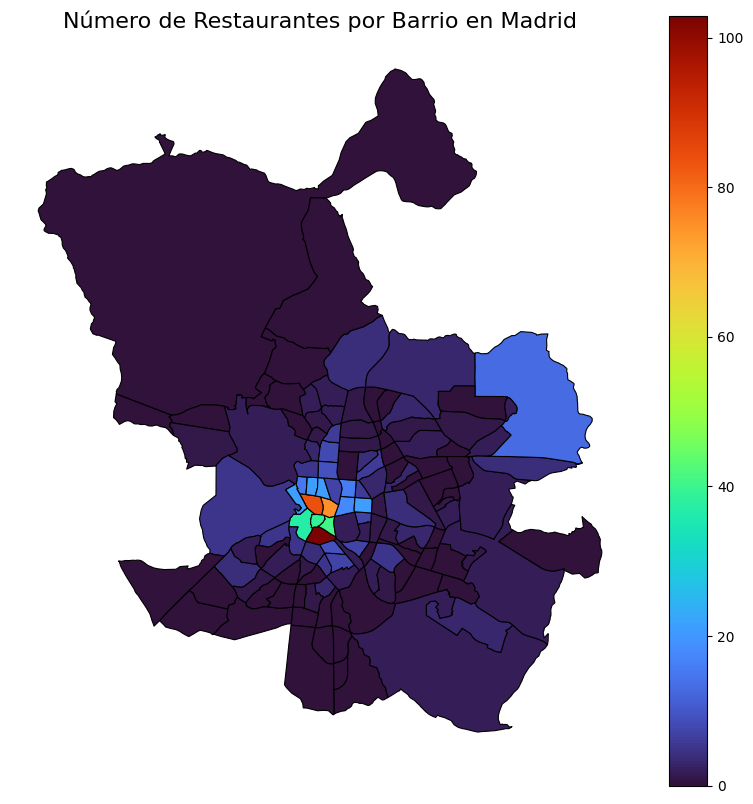

In [24]:
fig2, ax = plt.subplots(1, 1, figsize=(10, 10))
barrios_madrid.plot(column='count', cmap='turbo', linewidth=0.8, ax=ax, edgecolor='black', legend=True)
ax.set_title('Número de Restaurantes por Barrio en Madrid', fontsize=16)
ax.axis('off')
plt.show()

In [25]:
df_pandas

,Name,Address,Lat,Long,Number of Ratings,Restaurant Rating,Type of Restaurant,Number of Bookmarks,Price Range,Phone Number,Website,Instagram,Facebook,Timetable,url,NOMBRE_DISTRITO
id,,,,,,,,,,,,,,,,
1,Freedom Cakes Diner,"Calle Cádiz 7,Madrid,Spain,28004",40.415876,-3.702805,470.0,4.5,['International'],766,Moderado,+34-910741347,http://www.freedomcakes.es/,http://www.instagram.com/freedomcakes,http://facebook.com/Freedomcakesvegan,"{'Monday': '08:00 - 00:00', 'Tuesday': '08:00 ...",https://www.happycow.net/reviews/freedom-cakes...,Centro
2,Mad Mad Vegan - Chueca,"Calle Pelayo 19,Madrid,Spain,28004",40.422698,-3.698609,410.0,5.0,"['American', 'Mexican']",612,Moderado,+34-914442077,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-madri...,Centro
3,Frutas Prohibidas,"Calle del Conde Duque, 26,Madrid,Spain,28015",40.427467,-3.710349,241.0,5.0,"['International', 'Fusion']",555,Moderado,+34-911525533,http://www.frutasprohibidas.com/,http://www.instagram.com/frutasprohibidasbar,http://facebook.com/frutasprohibidasbar,"{'Monday': 'Closed', 'Tuesday': 'Closed', 'Wed...",https://www.happycow.net/reviews/frutas-prohib...,Centro
4,Mad Mad Vegan - Lavapiés,"Lavapiés 16,Madrid,Spain,28012",40.411113,-3.703039,216.0,4.5,"['American', 'Mexican']",465,Moderado,+34-910665299,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-vegan...,Centro
5,Flower Burger,"Calle Luchana 13, Chamberí,Madrid,Spain,28010",40.430001,-3.701037,14.0,4.5,"['American', 'Western']",47,Barato,+34-910328968,https://www.flowerburger.it/,http://www.instagram.com/flowerburger_es,http://facebook.com/flowerburger.it,"{'Monday': '13:00 - 16:30, 19:30 - 23:30', 'Tu...",https://www.happycow.net/reviews/flower-burger...,Chamberi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,Morgano Crafted Beers,"Alamo 2, Boadilla del Monte, Madrid, Spain, 28660",40.405759,-3.876917,1.0,4.0,"['Middle Eastern', 'Spanish']",2,Barato,+34-695635423,No website,No instagram,http://facebook.com/MorganoCraftedBeers,"{'Monday': '19:00 - 01:00', 'Tuesday': '19:00 ...",https://www.happycow.net/reviews/morgano-craft...,NaN
745,Adagio Gelateria,"Avenida de Adolfo Suárez, 7, Boadilla Del Mont...",40.405413,-3.876999,1.0,4.0,['Italian'],0,No price range,+34-912859853,No website,http://www.instagram.com/adagiogelateria,http://facebook.com/adagiogelateria,"{'Monday': '10:00 - 22:30', 'Tuesday': '10:00 ...",https://www.happycow.net/reviews/adagio-gelate...,NaN
746,La Huella Vegana,"Calle de las Trece Rosas, 2,Rivas-vaciamadrid,...",40.376390,-3.540020,31.0,4.5,"['Western', 'Spanish']",42,Moderado,+34-917139958,http://www.lahuellavegana.com/,No instagram,http://facebook.com/lahuellavegana,"{'Monday': '08:30 - 23:00', 'Tuesday': '08:30 ...",https://www.happycow.net/reviews/la-huella-riv...,NaN


In [26]:
df_pandas_barrios

,Name,Address,Lat,Long,Number of Ratings,Restaurant Rating,Type of Restaurant,Number of Bookmarks,Price Range,Phone Number,Website,Instagram,Facebook,Timetable,url,NOMBRE_BARRIO
id,,,,,,,,,,,,,,,,
1,Freedom Cakes Diner,"Calle Cádiz 7,Madrid,Spain,28004",40.415876,-3.702805,470.0,4.5,['International'],766,Moderado,+34-910741347,http://www.freedomcakes.es/,http://www.instagram.com/freedomcakes,http://facebook.com/Freedomcakesvegan,"{'Monday': '08:00 - 00:00', 'Tuesday': '08:00 ...",https://www.happycow.net/reviews/freedom-cakes...,Sol
2,Mad Mad Vegan - Chueca,"Calle Pelayo 19,Madrid,Spain,28004",40.422698,-3.698609,410.0,5.0,"['American', 'Mexican']",612,Moderado,+34-914442077,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-madri...,Justicia
3,Frutas Prohibidas,"Calle del Conde Duque, 26,Madrid,Spain,28015",40.427467,-3.710349,241.0,5.0,"['International', 'Fusion']",555,Moderado,+34-911525533,http://www.frutasprohibidas.com/,http://www.instagram.com/frutasprohibidasbar,http://facebook.com/frutasprohibidasbar,"{'Monday': 'Closed', 'Tuesday': 'Closed', 'Wed...",https://www.happycow.net/reviews/frutas-prohib...,Universidad
4,Mad Mad Vegan - Lavapiés,"Lavapiés 16,Madrid,Spain,28012",40.411113,-3.703039,216.0,4.5,"['American', 'Mexican']",465,Moderado,+34-910665299,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-vegan...,Embajadores
5,Flower Burger,"Calle Luchana 13, Chamberí,Madrid,Spain,28010",40.430001,-3.701037,14.0,4.5,"['American', 'Western']",47,Barato,+34-910328968,https://www.flowerburger.it/,http://www.instagram.com/flowerburger_es,http://facebook.com/flowerburger.it,"{'Monday': '13:00 - 16:30, 19:30 - 23:30', 'Tu...",https://www.happycow.net/reviews/flower-burger...,Ríos Rosas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,Morgano Crafted Beers,"Alamo 2, Boadilla del Monte, Madrid, Spain, 28660",40.405759,-3.876917,1.0,4.0,"['Middle Eastern', 'Spanish']",2,Barato,+34-695635423,No website,No instagram,http://facebook.com/MorganoCraftedBeers,"{'Monday': '19:00 - 01:00', 'Tuesday': '19:00 ...",https://www.happycow.net/reviews/morgano-craft...,NaN
745,Adagio Gelateria,"Avenida de Adolfo Suárez, 7, Boadilla Del Mont...",40.405413,-3.876999,1.0,4.0,['Italian'],0,No price range,+34-912859853,No website,http://www.instagram.com/adagiogelateria,http://facebook.com/adagiogelateria,"{'Monday': '10:00 - 22:30', 'Tuesday': '10:00 ...",https://www.happycow.net/reviews/adagio-gelate...,NaN
746,La Huella Vegana,"Calle de las Trece Rosas, 2,Rivas-vaciamadrid,...",40.376390,-3.540020,31.0,4.5,"['Western', 'Spanish']",42,Moderado,+34-917139958,http://www.lahuellavegana.com/,No instagram,http://facebook.com/lahuellavegana,"{'Monday': '08:30 - 23:00', 'Tuesday': '08:30 ...",https://www.happycow.net/reviews/la-huella-riv...,NaN


In [27]:
df_pandas["NOMBRE_BARRIO"] = df_pandas_barrios["NOMBRE_BARRIO"]

In [28]:
df_pandas

,Name,Address,Lat,Long,Number of Ratings,Restaurant Rating,Type of Restaurant,Number of Bookmarks,Price Range,Phone Number,Website,Instagram,Facebook,Timetable,url,NOMBRE_DISTRITO,NOMBRE_BARRIO
id,,,,,,,,,,,,,,,,,
1,Freedom Cakes Diner,"Calle Cádiz 7,Madrid,Spain,28004",40.415876,-3.702805,470.0,4.5,['International'],766,Moderado,+34-910741347,http://www.freedomcakes.es/,http://www.instagram.com/freedomcakes,http://facebook.com/Freedomcakesvegan,"{'Monday': '08:00 - 00:00', 'Tuesday': '08:00 ...",https://www.happycow.net/reviews/freedom-cakes...,Centro,Sol
2,Mad Mad Vegan - Chueca,"Calle Pelayo 19,Madrid,Spain,28004",40.422698,-3.698609,410.0,5.0,"['American', 'Mexican']",612,Moderado,+34-914442077,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-madri...,Centro,Justicia
3,Frutas Prohibidas,"Calle del Conde Duque, 26,Madrid,Spain,28015",40.427467,-3.710349,241.0,5.0,"['International', 'Fusion']",555,Moderado,+34-911525533,http://www.frutasprohibidas.com/,http://www.instagram.com/frutasprohibidasbar,http://facebook.com/frutasprohibidasbar,"{'Monday': 'Closed', 'Tuesday': 'Closed', 'Wed...",https://www.happycow.net/reviews/frutas-prohib...,Centro,Universidad
4,Mad Mad Vegan - Lavapiés,"Lavapiés 16,Madrid,Spain,28012",40.411113,-3.703039,216.0,4.5,"['American', 'Mexican']",465,Moderado,+34-910665299,https://madmadvegan.com/,http://www.instagram.com/madmadvegan,http://facebook.com/MADMADVEGAN,"{'Monday': '13:00 - 00:00', 'Tuesday': '13:00 ...",https://www.happycow.net/reviews/mad-mad-vegan...,Centro,Embajadores
5,Flower Burger,"Calle Luchana 13, Chamberí,Madrid,Spain,28010",40.430001,-3.701037,14.0,4.5,"['American', 'Western']",47,Barato,+34-910328968,https://www.flowerburger.it/,http://www.instagram.com/flowerburger_es,http://facebook.com/flowerburger.it,"{'Monday': '13:00 - 16:30, 19:30 - 23:30', 'Tu...",https://www.happycow.net/reviews/flower-burger...,Chamberi,Ríos Rosas
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
744,Morgano Crafted Beers,"Alamo 2, Boadilla del Monte, Madrid, Spain, 28660",40.405759,-3.876917,1.0,4.0,"['Middle Eastern', 'Spanish']",2,Barato,+34-695635423,No website,No instagram,http://facebook.com/MorganoCraftedBeers,"{'Monday': '19:00 - 01:00', 'Tuesday': '19:00 ...",https://www.happycow.net/reviews/morgano-craft...,NaN,NaN
745,Adagio Gelateria,"Avenida de Adolfo Suárez, 7, Boadilla Del Mont...",40.405413,-3.876999,1.0,4.0,['Italian'],0,No price range,+34-912859853,No website,http://www.instagram.com/adagiogelateria,http://facebook.com/adagiogelateria,"{'Monday': '10:00 - 22:30', 'Tuesday': '10:00 ...",https://www.happycow.net/reviews/adagio-gelate...,NaN,NaN
746,La Huella Vegana,"Calle de las Trece Rosas, 2,Rivas-vaciamadrid,...",40.376390,-3.540020,31.0,4.5,"['Western', 'Spanish']",42,Moderado,+34-917139958,http://www.lahuellavegana.com/,No instagram,http://facebook.com/lahuellavegana,"{'Monday': '08:30 - 23:00', 'Tuesday': '08:30 ...",https://www.happycow.net/reviews/la-huella-riv...,NaN,NaN


In [29]:
df_pandas.to_csv("restaurantes_con_distrito_barrio.csv")